<a href="https://colab.research.google.com/github/Harshil1450/Harshil/blob/main/Boosting_technique_assignmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Theoretical Part**


### 1. **What is Boosting in Machine Learning?**  
   Boosting is an ensemble learning technique that combines multiple weak learners (typically decision trees) sequentially to create a strong predictive model. Each new model corrects the errors of the previous ones by giving higher weights to misclassified instances.

### 2. **How does Boosting differ from Bagging?**  
   - **Boosting** focuses on sequentially improving weak learners, where each new model corrects the mistakes of the previous ones.  
   - **Bagging** (Bootstrap Aggregating) trains multiple models independently on bootstrapped datasets and then averages (or votes) their outputs to reduce variance.  

### 3. **What is the key idea behind AdaBoost?**  
   Adaptive Boosting (AdaBoost) assigns weights to training samples and emphasizes misclassified ones in subsequent iterations. It combines weak classifiers into a strong classifier by adjusting sample importance dynamically.

### 4. **Explain the working of AdaBoost with an example.**  
   - Start with equal weights for all training samples.  
   - Train a weak learner (e.g., a decision stump).  
   - Compute the error and assign higher weights to misclassified samples.  
   - Train the next weak learner with updated weights.  
   - Repeat for multiple iterations and combine weak learners using weighted voting.  
   **Example:** If an image classification task misclassifies cats, AdaBoost will increase their weights, making the next model focus more on correctly classifying cats.

### 5. **What is Gradient Boosting, and how is it different from AdaBoost?**  
   - Gradient Boosting builds models sequentially like AdaBoost but optimizes for a differentiable loss function using gradient descent.  
   - AdaBoost adjusts weights based on classification errors, whereas Gradient Boosting minimizes the residual errors in a regression-like approach.

### 6. **What is the loss function in Gradient Boosting?**  
   It depends on the task:  
   - **Regression:** Mean Squared Error (MSE)  
   - **Classification:** Log Loss or Cross-Entropy Loss  

### 7. **How does XGBoost improve over traditional Gradient Boosting?**  
   XGBoost (Extreme Gradient Boosting) improves by:  
   - Regularization (L1 & L2) to prevent overfitting  
   - Parallel processing for faster training  
   - Handling missing values efficiently  
   - Shrinkage (learning rate) to improve convergence  
   - Feature importance ranking  

### 8. **What is the difference between XGBoost and CatBoost?**  
   - **XGBoost** is efficient and widely used but requires manual preprocessing of categorical features.  
   - **CatBoost** is optimized for categorical data and automatically handles categorical features without one-hot encoding.  

### 9. **What are some real-world applications of Boosting techniques?**  
   - Fraud detection (banking)  
   - Medical diagnosis  
   - Customer churn prediction  
   - Recommendation systems  
   - Search ranking (Google, Bing)  

### 10. **How does regularization help in XGBoost?**  
   Regularization (L1 and L2) reduces model complexity and prevents overfitting by penalizing large coefficients in the decision trees.

### 11. **What are some hyperparameters to tune in Gradient Boosting models?**  
   - Learning rate  
   - Number of trees (n_estimators)  
   - Maximum tree depth  
   - Minimum child weight  
   - Subsample ratio  
   - Regularization parameters (L1, L2)  

### 12. **What is the concept of Feature Importance in Boosting?**  
   Feature Importance helps understand which features contribute most to predictions. Boosting models calculate importance based on how often a feature is used for splits and its impact on reducing loss.

### 13. **Why is CatBoost efficient for categorical data?**  
   - Uses **ordered boosting** to reduce target leakage  
   - Handles categorical variables without preprocessing  
   - Reduces memory usage and speeds up training  



**Practical part**

In [ ]:
#Q-14>>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X=data.data
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy*100)

Accuracy: 97.36842105263158


In [ ]:
#Q-15>>
#using above same datsset
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
adr =  AdaBoostRegressor(n_estimators=100, random_state=42)
adr.fit(X_train, y_train)
y_pred = adr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.09264116742220589


In [ ]:
#Q-16>>
#As we have used breast cancer dataset above so using the same dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
feature_importance = gbc.feature_importances_
print("Accuracy:", accuracy)
print("Feature Importance:", feature_importance)

Accuracy: 0.865
Feature Importance: [0.04868048 0.0037274  0.01360612 0.06181576 0.01003332 0.00572917
 0.01820446 0.00897762 0.00769659 0.01991465 0.00369791 0.01818897
 0.70191206 0.00358013 0.0242999  0.01347535 0.00302717 0.00967117
 0.0162137  0.00754808]


In [ ]:
#Q-17>>
#As we have used breast cancer dataset above so using the same dataset
#
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-Squared Score:", r2)

R-Squared Score: 0.5964152066650592


In [ ]:
#Q-18>>
#Using above same dataset
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=100, random_state=42)
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy XGBClassifier:", accuracy)
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy GradientBoostingClassifier:", accuracy)

Accuracy XGBClassifier: 0.845
Accuracy GradientBoostingClassifier: 0.865


In [ ]:
#Q-19>>
#Using above same dataset
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
cbc = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cbc.fit(X_train, y_train)
f1=accuracy_score(y_test,y_pred)
print("F1 Score:", f1)

F1 Score: 0.865


In [ ]:
#Q-20>>
# Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)4
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xgbr = XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.11425188183784485


Feature Importance: [0.         0.06926252 0.         0.         0.01992673 0.0178256
 0.         0.10152852 0.0592247  0.01448986 0.01849122 0.
 0.         0.04465856 0.0304841  0.06579934 0.         0.
 0.02563839 0.         0.         0.08322844 0.03098204 0.14120235
 0.0648929  0.01202091 0.05210853 0.07018233 0.07805295 0.        ]


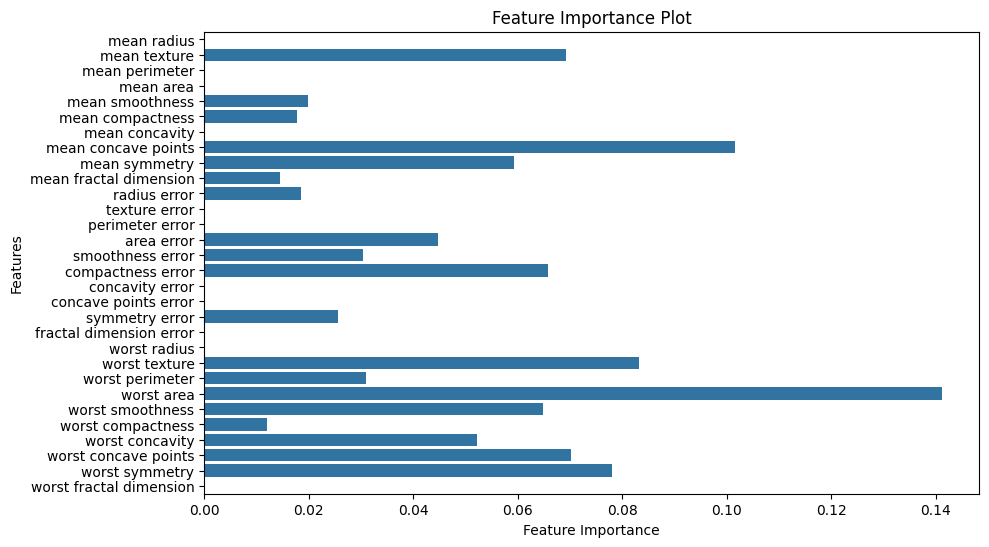

In [ ]:
#Q-21>>
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
feature_importance = abc.feature_importances_
print("Feature Importance:", feature_importance)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=data.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:
#Q-22>>
#Using same dataset
from sklearn.model_selection import learning_curve
gbr = GradientBoostingRegressor(n_estimators = 100,random_state = 1)
gbr.fit(X_train,y_train)
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.title("Learning Curves (Gradient Boosting Regressor)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [ ]:
#Q-23>>
#using above same data
xgr=XGBClassifier(n_estimators=100,random_state=1)
xgr.fit(X_train,y_train)
feature_importance = xgr.feature_importances_
print("Feature Importance:", feature_importance)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=data.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:


#Q-24>>
#using same sbove dataset
from sklearn.metrics import confusion_matrix
cbc = CatBoostClassifier(n_estimators = 100,random_state = 1)
cbc.fit(X_train,y_train)
y_pred = cbc.predict(X_test)
cfm = confusion_matrix(y_test,y_pred)
print(cfm)
plt.figure(figsize=(10,10))
sns.heatmap(cfm,annot = True,fmt = 'd',cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Q-25>>
#using same dataset
n_estimators = [10,50,100,200,500]
for i in n_estimators:
  abc = AdaBoostClassifier(n_estimators =i,random_state = 1 )
  abc.fit(X_train,y_train)
  y_pred = abc.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f"Accuracy for n_estimators = {i} is {accuracy}")

In [ ]:
#Q-26>>
#Using same dataset
from sklearn.metrics import roc_curve
gbc = GradientBoostingClassifier( n_estimators = 100,random_state = 1)
gbc.fit(X_train,y_train)
y_pred_proba= gbc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color = 'red')
plt.plot([0,1],[0,1],color = 'navy',linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
#Q-27>>
#using same dataset
from sklearn.model_selection import GridSearchCV
xgbr = XGBRegressor(n_estimators = 100,random_state = 1)
xgbr.fit(X_train,y_train)
y_pred = xgbr.predict(X_test)
param_grid = {
    'n_estimators': [50, 100,200]
}
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

In [ ]:
#Q-28>>
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 1000,n_features = 20,random_state = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
#Without weights
cbc = CatBoostClassifier(n_estimators = 100,random_state = 1,verbose = 0)
cbc.fit(X_train,y_train)
y_pred = cbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy without weights",accuracy)
#with weights
cbc = CatBoostClassifier(n_estimators = 100,random_state = 1,verbose = 0,class_weights = [0.1,0.9])
cbc.fit(X_train,y_train)
y_pred = cbc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy with weights",accuracy)

In [ ]:
#Q-29>>
#Using the same above dataset
learning_rate = [0.01,0.1,1]
for i in learning_rate:
  abc = AdaBoostClassifier(n_estimators = 100,random_state = 1,learning_rate = i)
  abc.fit(X_train,y_train)
  y_pred = abc.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f"Learning Rate: {i}, Accuracy: {accuracy}")

Learning Rate: 0.01, Accuracy: 0.86
Learning Rate: 0.1, Accuracy: 0.86
Learning Rate: 1, Accuracy: 0.855


In [ ]:
#Q-30>>
from sklearn.metrics import log_loss
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
xgb = XGBClassifier(n_estimators = 100,random_state = 1)
xgb.fit(X_train,y_train)
y_pred_proba= xgb.predict_proba(X_test)
log_loss = log_loss(y_test,y_pred_proba)
print(f"Log Loss: {log_loss}")

Log Loss: 0.42392601742785524
